In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection  import  train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
SC=StandardScaler()


In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Pre-processing

In [3]:
categorical_to_numerical_values = {"Gender": {"Male": 1, "Female": 0} }
data = data.replace(categorical_to_numerical_values)
X = np.array(data.drop(['User ID','Purchased','Gender'],axis=1))
X = SC.fit_transform(X)
X = np.column_stack([np.ones(len(X)),data['Gender'],X])
# X = np.column_stack([np.ones(len(X)),X])
Y = data['Purchased']
data['Age'] = X[:,2]
data['EstimatedSalary'] = X[:,3]

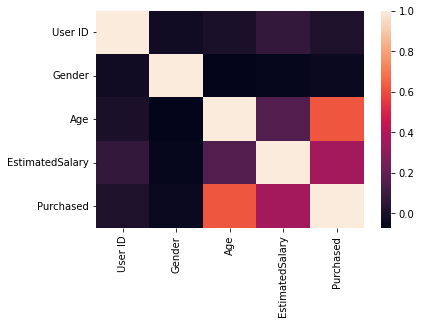

In [4]:
sns.heatmap(data.corr())

In [5]:
x_0 = X[Y==0]
x_1 = X[Y==1]
y_0 = Y[Y==0]
y_1 = Y[Y==1]

### 3D plot with different colors for y labels

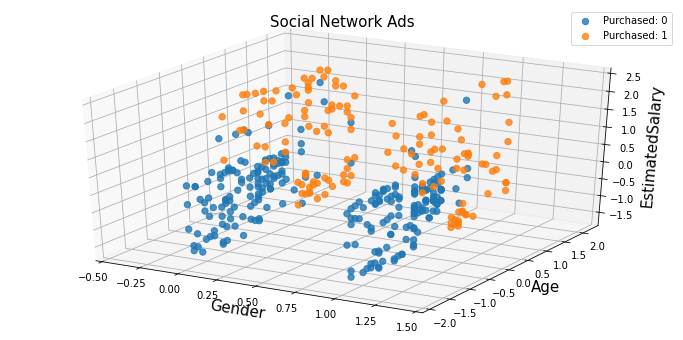

In [6]:
fig = plt.figure(figsize = (12, 6))
ax = plt.axes(projection ="3d")
ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.3, alpha = 0.2)
sctt = ax.scatter3D(x_0[:,1], x_0[:,2], x_0[:,3],alpha = 0.8,marker ='o', s=40)
sctt = ax.scatter3D(x_1[:,1], x_1[:,2], x_1[:,3],alpha = 0.8,marker ='o', s=40)
plt.title("Social Network Ads", fontsize=15)
ax.set_xlabel('Gender', fontsize=15)
ax.set_xlim(-0.5,1.5)
ax.set_ylabel('Age', fontsize=15)
ax.set_zlabel('EstimatedSalary', fontsize=15)
ax.legend(['Purchased: 0','Purchased: 1'])
plt.show()

In [7]:
def h(theta,x):
    mat = np.dot(x,theta)
    return 1./(1 + np.exp(-1*mat))
    
def get_theta(theta,x,y,alpha):
    next_theta = theta - alpha*np.dot(x.T,(h(theta,x).T - y).T)
    return next_theta

def cost(theta,x,y):
    cost = []
    for i in range(len(y)):
        cost.append(y[i]*np.log(h(theta,x[i])) +  (1-y[i])*np.log(1-h(theta,x[i])))
    
    return np.sum(cost)

def classify(x,theta):
    if np.dot(x,theta)>0:
        return 1
    else:
        return 0

def get_metrics(real,pred):
    n = len(real)
    tp = 0; tn = 0; fp = 0; fn = 0
    for i in range(n):
        if real[i]==pred[i]:
            if real[i]==1:
                tp+=1
            else:
                tn+=1
        else:
            if real[i]==0:
                fp+=1
            else:
                fn+=1
            
    accuracy = (tp+tn)/n
    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    f1 = 2*precision*recall/(precision + recall)
    confusion_matrix = [[tn, fp],[fn, tp]]
    return accuracy, precision, recall, f1, confusion_matrix


### Split into training and testing set

In [8]:
x_train , x_test , y_train , y_test = train_test_split(X, Y, test_size =0.1, random_state = 0, stratify=Y)

In [9]:
y_test = np.array(y_test)
y_train = np.array(y_train)

### Get the Parameters

In [10]:
m = len(y_train)
n = len(x_train[0])
theta = np.zeros([n,1])
iterations = 10000
alpha =0.0001
j_theta = []
for i in range(iterations):
    j_theta.append(-cost(theta,x_train,y_train)/m)
    theta = get_theta(theta,x_train,y_train,alpha)
print('Theta0: ',theta[0,0],'\nTheta1: ',theta[1,0],'\nTheta2: ',theta[2,0],'\nTheta3: ',theta[3,0])
print()

Theta0:  -1.2392196790395447 
Theta1:  0.2149110501550106 
Theta2:  2.3525012347012835 
Theta3:  1.1950110270768595



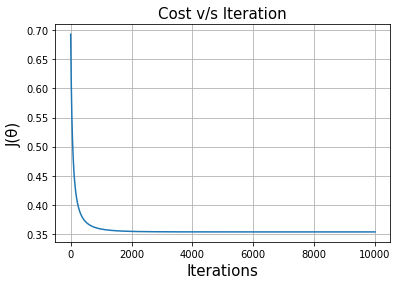

In [13]:
plt.plot(np.arange(0,iterations,1),j_theta)
plt.xlabel('Iterations',fontsize=15)
plt.ylabel('J(θ)',fontsize=15)
plt.title('Cost v/s Iteration',fontsize=15)
plt.grid()

### Evaluate the necessary metrics to show the goodness of fit

In [ ]:
y_pred = []
for i in range(len(x_test)):
    y_pred.append(classify(x_test[i],theta))

accuracy, precision, recall, f1, confusionMatrix = get_metrics(y_test,y_pred)
print('Accuracy of our model: ', accuracy)
print('Precision of our model: ', precision)
print('Recall of our model: ', recall)
print('F1 score of our model: ', f1)

Accuracy of our model:  0.875
Precision of our model:  0.9090909090909091
Recall of our model:  0.7142857142857143
F1 score of our model:  0.8


Text(0.5, 1.0, 'Our LogisticRegression')

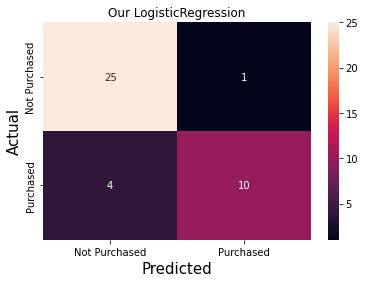

In [ ]:
sns.heatmap(confusionMatrix,annot=True,xticklabels=['Not Purchased','Purchased'],yticklabels=['Not Purchased','Purchased'])
plt.xlabel('Predicted',fontsize=15)
plt.ylabel('Actual',fontsize=15)
plt.title('Our LogisticRegression')

### Repeat using inbuilt functions

In [ ]:
clf = LogisticRegression(max_iter=10000).fit(x_train, y_train)

In [ ]:
coefs = [clf.intercept_[0],clf.coef_[0,1],clf.coef_[0,2],clf.coef_[0,3]]
print('Theta0: ',coefs[0],'\nTheta1: ',coefs[1],'\nTheta2: ',coefs[2],'\nTheta3: ',coefs[3])

Theta0:  -1.1638809746348517 
Theta1:  0.17256103685320412 
Theta2:  2.1734096510790266 
Theta3:  1.1058234994174232


In [ ]:
accuracy_inbuilt = accuracy_score(y_test, clf.predict(x_test))
precision_inbuilt = precision_score(y_test, clf.predict(x_test))
recall_inbuilt = recall_score(y_test, clf.predict(x_test))
f1_inbuilt = f1_score(y_test, clf.predict(x_test))
print('Accuracy of inbuilt model: ', accuracy_inbuilt)
print('Precision of inbuilt model: ', precision_inbuilt)
print('Recall of inbuilt model: ', recall_inbuilt)
print('F1 score of inbuilt model: ', f1_inbuilt)

Accuracy of inbuilt model:  0.875
Precision of inbuilt model:  0.9090909090909091
Recall of inbuilt model:  0.7142857142857143
F1 score of inbuilt model:  0.8


Text(0.5, 1.0, 'Inbuilt LogisticRegression')

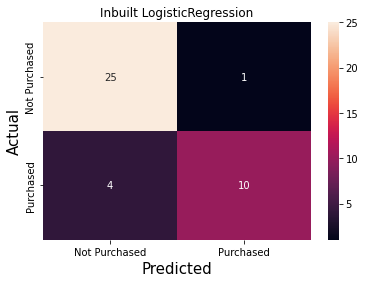

In [ ]:
tn, fp, fn, tp  = confusion_matrix(y_test, clf.predict(x_test)).ravel()
sns.heatmap([[tn,fp],[fn,tp]],annot=True,xticklabels=['Not Purchased','Purchased'],yticklabels=['Not Purchased','Purchased'])
plt.xlabel('Predicted',fontsize=15)
plt.ylabel('Actual',fontsize=15)
plt.title('Inbuilt LogisticRegression')

### Metrics for Training data

In [ ]:
y_pred_train = []
for i in range(len(x_train)):
    y_pred_train.append(classify(x_train[i],theta))

accuracy, precision, recall, f1, confusionMatrix = get_metrics(y_train,y_pred_train)
print('Accuracy of our model: ', accuracy)
print('Precision of our model: ', precision)
print('Recall of our model: ', recall)
print('F1 score of our model: ', f1)

Accuracy of our model:  0.85
Precision of our model:  0.831858407079646
Recall of our model:  0.7286821705426356
F1 score of our model:  0.7768595041322314


In [ ]:
y_inbuilt_train = clf.predict(x_train)
accuracy, precision, recall, f1, confusionMatrix = get_metrics(y_train,y_inbuilt_train)
print('Accuracy of our model: ', accuracy)
print('Precision of our model: ', precision)
print('Recall of our model: ', recall)
print('F1 score of our model: ', f1)

Accuracy of our model:  0.8444444444444444
Precision of our model:  0.8288288288288288
Recall of our model:  0.7131782945736435
F1 score of our model:  0.7666666666666668
